In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
pwd

'/Users/miguel_daal/Documents/Projects/Resonator_Analysis_Package/rap/rap/examples'

In [3]:
#Add rap package to search path 
import sys
sys.path.append('../..')

In [4]:
import rap

rap level init
rap.sweeps level init


In [5]:
#importlib provides the reload function 
import importlib

In [6]:
# Reload the rap package in the case we are making changes to its code.
importlib.reload(rap.sweeps.sweep)
import rap.env_var
importlib.reload(rap.env_var)

<module 'rap.env_var' from '../../rap/env_var.py'>

In [7]:
swp = rap.sweep(database_location = './resonator_data/My_Data_Library.h5')

In [8]:
database_location =  './rap/examples/resonator_data/My_Data_Library.h5'
filename1 = './52a_survey.mat'
filename2 = './Coupling6_rescale2_full_23pH.s2p'
filename3 = './S5_truegapdistance.s2p'


In [9]:
swp.load_scandata(filename1)
swp.sweep_array_info()

Loading Run: 52a
There are 1 heater voltage(s), 1 input power(s), and 1 frequecy span(s)
Temperature readings found for scan(s). 50 readings per scan
001 - Total number of sweeps.
001 - Number of readout powers.
001 - Number of readout temperatures.
050 - Number of temperatures readings.
001 - Number of frequency bands.


S21 downsampled by factor n = 14.
cable delay is 9.766909658125095e-08 seconds by minimum distance method


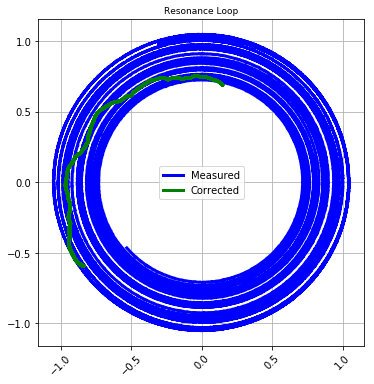

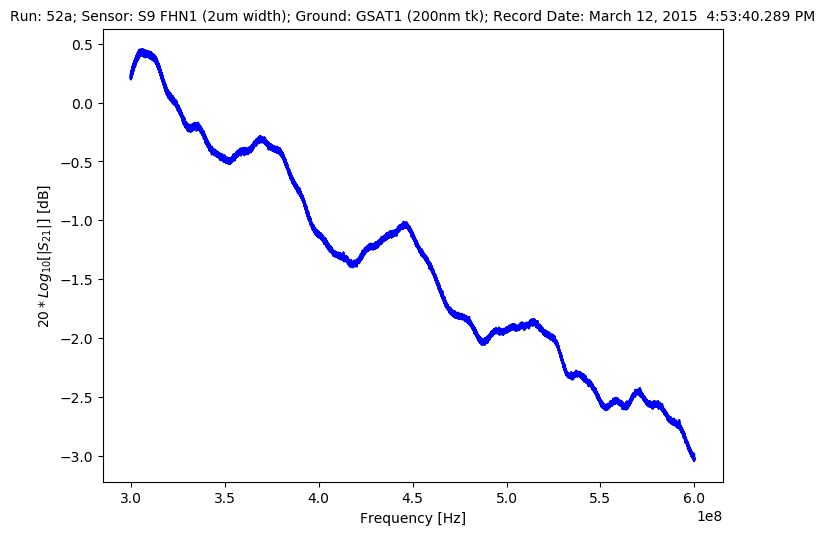

(<Figure size 800x600 with 1 Axes>,
 [<matplotlib.lines.Line2D at 0x1c1c2d5550>])

In [10]:
swp.pick_loop(0)
swp.remove_cable_delay(Show_Plot = True, Verbose = True,Force_Recalculate = True)
swp.plot_transmission()

In [11]:
swp.save_hf5()

Speficied h5 database exists and will be updated.
Table /Run52a/T201503121653 exists. Aborting...


In [12]:
swp.load_touchstone(filename2, pick_loop=True)

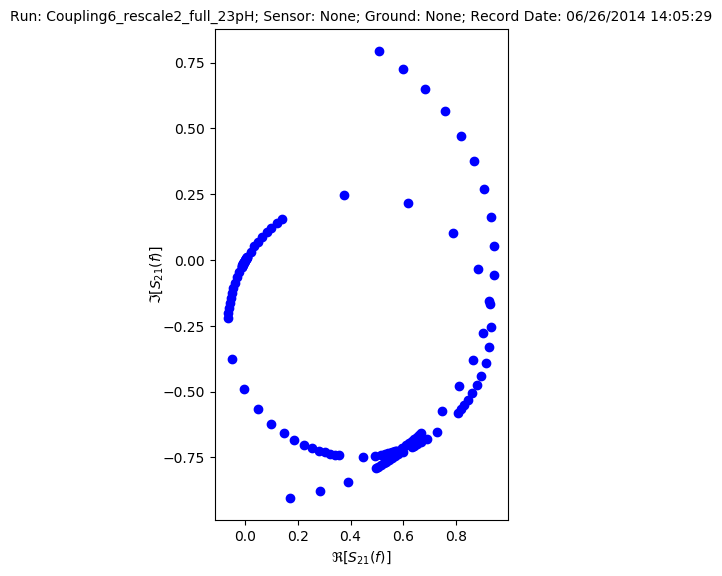

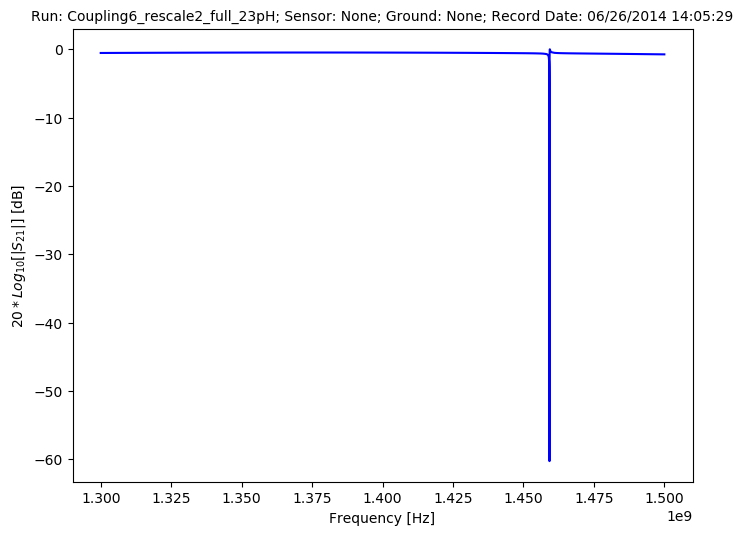

(<Figure size 800x600 with 1 Axes>,
 [<matplotlib.lines.Line2D at 0x1c1cc0af28>])

In [13]:
swp.plot_loop(aspect = 'equal')
swp.plot_transmission()

Bandwidth cut:
	54 points outside of fr_est +/- 3*FWHM_est removed, 66 remaining data points


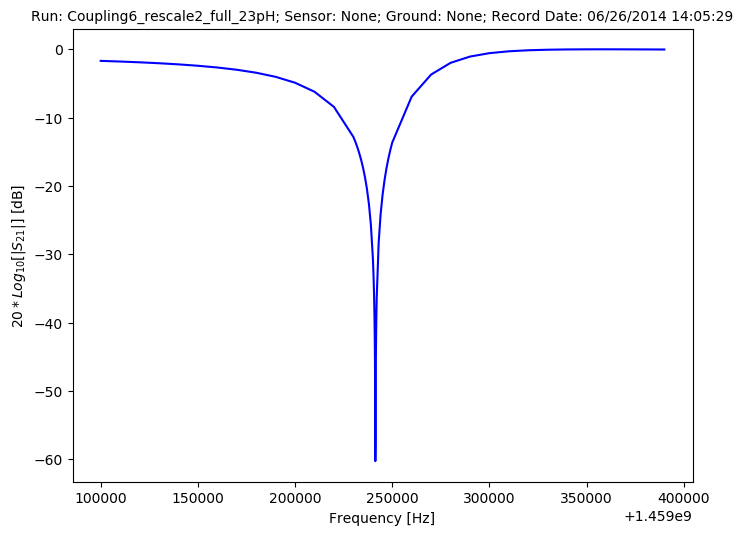

In [14]:
# lets trim this data so that we only have points that are 3*FWHM bandwidth away from each side of the
# transmission minimum. This will reduce the number of points we have to worry about...
swp.trim_loop(N=3, Verbose = True)
# see what was done
swp.plot_transmission(show = True);

In [15]:
## something to fix -- this loop must be trimmed for circle fit to fit is correctly
#swp.pick_loop(0)

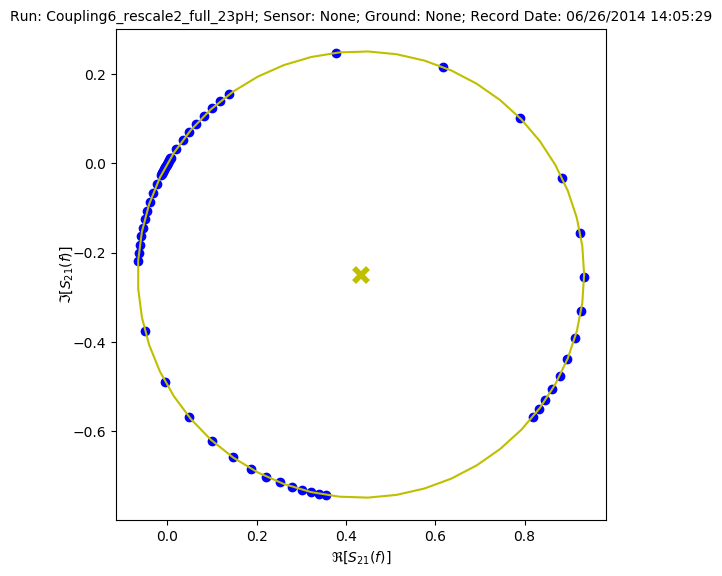

In [16]:
# next we fit the loop to a circle.
swp.circle_fit(Show_Plot = True)

Duplicates cuts:
	1 duplicate frequencies removed from loop data, 65 remaining data points
Radius cut:
	0 points < r_loop*0.75 or > r_loop*1.75 found and removed, 65 remaining data points
Bandwidth cut:
	0 points outside of fr_est +/- 8*FWHM_est removed, 65 remaining data points
Angle jump cut:
	0 points with discontinuous jumps in loop angle removed, 65 remaining data points
Initial Guess:
	Loop rotation 180.11075894298847 deg, fr 1459241300.0, Q 29184.826

Powell Minimzation Result:
   direc: array([[ 7.91046259e-09, -1.55210479e-04,  3.73559268e-04],
       [ 1.95828173e-01,  7.07226870e+03,  6.48573128e+01],
       [-1.21841264e-09,  0.00000000e+00,  2.90235583e-04]])
     fun: 3.8495583862779484e-05
 message: 'Optimization terminated successfully.'
    nfev: 1796
     nit: 14
  status: 0
 success: True
       x: array([-3.62303056e+00,  1.45925593e+09,  1.89781919e+04])


Nelder-Mead Minimzation Result:
 final_simplex: (array([[-1.02904873e+00,  2.54308289e+09,  3.57008281e+04],
 

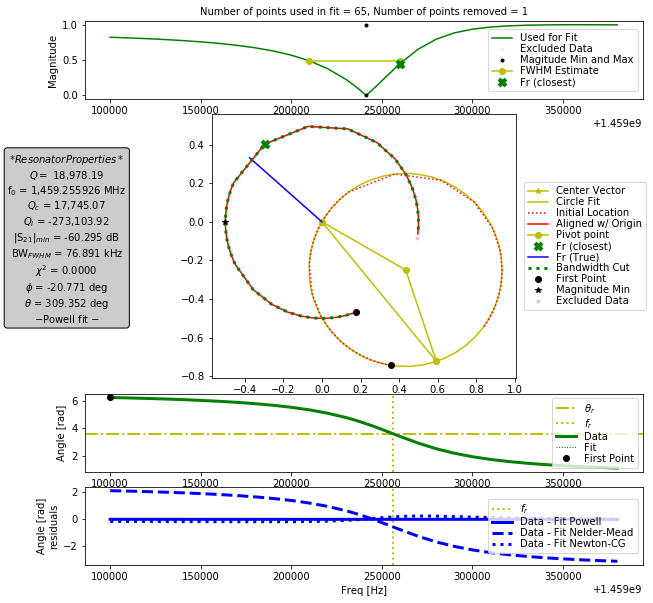

In [17]:
swp.phase_fit(Fit_Method = 'Multiple',Verbose = True, Show_Plot = True)

In [20]:
swp.save_hf5()

Speficied h5 database exists and will be updated.
Table /RunCoupling6_rescale2_full_23pH/T201406261405 exists. Aborting...


In [21]:
swp.load_touchstone(filename3, pick_loop=True)

In [22]:
swp.save_hf5()

Speficied h5 database exists and will be updated.
Table /RunS5_truegapdistance/T201406270542 exists. Aborting...


In [23]:
swp.construct_hf5_toc()

Column names are:
('Run', 'Time_Created', 'Num_Ranges', 'Num_Powers', 'Num_Temperature_Readings', 'Num_Temperature_Set_Points', 'Sensor', 'Ground_Plane', 'Path')
Rows, i.e. data, are:
[(b'52a', b'March 12, 2015  4:53:40.289 PM', 1,  1, 50, 1, b'S9 FHN1 (2um width)', b'GSAT1 (200nm tk)', b'/Run52a/T201503121653')
 (b'Coupling6_', b'06/26/2014 14:05:29', 1,  1,  0, 1, b'', b'', b'/RunCoupling6_rescale2_full_23pH/T201406261405')
 (b'F1', b'05/01/2015 12:00:00', 1, 10,  0, 1, b'', b'', b'/RunF1/T201505011200')
 (b'S5_truegap', b'06/27/2014 05:42:39', 1,  1,  0, 1, b'', b'', b'/RunS5_truegapdistance/T201406270542')]


Generating False Data...
 10 of 10 

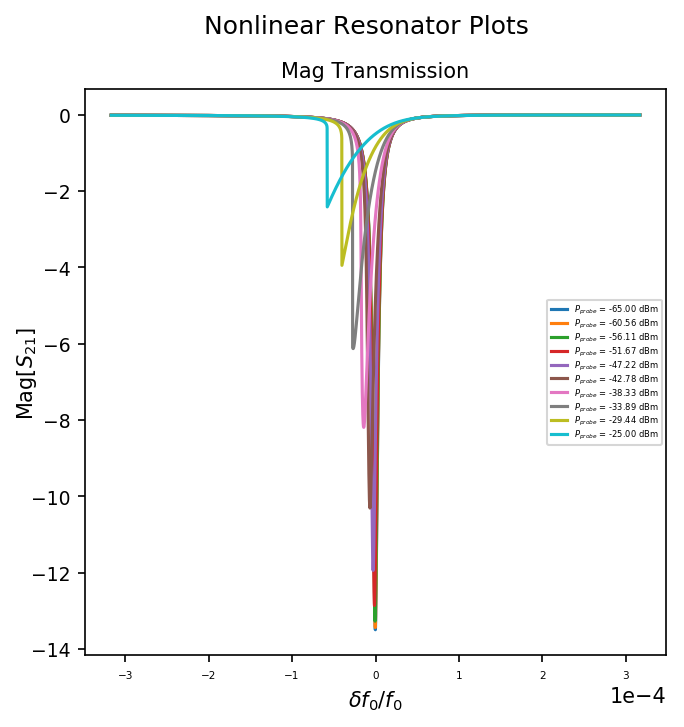

(<Figure size 750x750 with 1 Axes>,
 {1: <matplotlib.axes._subplots.AxesSubplot at 0x1c1d3e69e8>})

In [24]:
swp.generate_nonlinear_data()

In [25]:
swp.save_hf5(overwrite = True)
swp.construct_hf5_toc()

Speficied h5 database exists and will be updated.
Table /RunF1/T201505011200 exists. Overwriting...
table metadata Atten_Added_At_NA not defined and is set to None
table metadata NA_Average_Factor not defined and is set to None
table metadata Fridge_Base_Temp not defined and is set to None
table metadata Box not defined and is set to None
table metadata Ground_Plane not defined and is set to None
table metadata Ground_Plane_Thickness not defined and is set to None
table metadata Test_Location not defined and is set to None
table metadata Minimum_Q not defined and is set to None
table metadata Notes not defined and is set to None
table metadata Num_Points_Per_Scan not defined and is set to None
table metadata Wait_Time not defined and is set to None
table metadata Press not defined and is set to None
table metadata Min_Freq_Resolution not defined and is set to None
table metadata Sensor not defined and is set to None
table metadata Fridge_Run_Start_Date not defined and is set to None
ta